<a href="https://colab.research.google.com/github/saryurawaley/Engphys3mn4/blob/main/Assignments/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2

Due EOD Thursday Oct 2nd

## Question 1

A nuclear fuel pellet is a cylinder, 1.5 cm in lenth and 1 cm in diameter. Assume the surface temperature is 300 C everywhere. Given temperature probe data below, determine the radial temperature profile in the middle of a nuclear fuel pellet (i.e.: T(r, z = 0.75)) using radial basis functions.


In [ ]:
import numpy as np

# 20 data points presented in columns: | x | y | z | T |, measurements in cm

data = np.array([
    [5.1690e-02, 2.3766e-01, 6.7059e-01, 5.2645e+02],
    [1.1353e-01, 9.4708e-02, 5.3856e-01, 5.5201e+02],
    [1.6676e-01, 1.4358e-01, 4.6936e-01, 5.0802e+02],
    [1.3610e-01, 3.7207e-02, 2.1694e-01, 4.3663e+02],
    [8.9225e-02, 3.7293e-01, 1.1270e+00, 3.9234e+02],
    [1.9001e-01, 3.7240e-01, 8.4774e-01, 3.8872e+02],
    [5.4849e-02, 3.5425e-01, 5.7478e-01, 4.3784e+02],
    [1.7001e-01, 2.0241e-01, 1.2960e+00, 4.0159e+02],
    [2.0606e-01, 3.1594e-01, 6.4077e-01, 4.2652e+02],
    [2.5382e-01, 2.5859e-01, 4.8610e-01, 4.2481e+02],
    [5.6038e-02, 8.2231e-02, 4.2029e-01, 5.3244e+02],
    [3.1242e-01, 8.0489e-02, 1.1530e+00, 4.2453e+02],
    [6.0186e-02, 4.4891e-01, 3.9941e-01, 3.4207e+02],
    [1.5070e-01, 3.4794e-01, 1.5595e-01, 3.4750e+02],
    [1.8215e-01, 3.4388e-01, 1.0478e+00, 3.9963e+02],
    [1.1633e-01, 4.1011e-01, 5.5001e-01, 3.7611e+02],
    [1.2377e-01, 3.3703e-01, 3.7672e-02, 3.1423e+02],
    [4.6378e-02, 3.3653e-01, 1.4434e+00, 3.2345e+02],
    [2.9063e-02, 3.2584e-02, 2.3977e-01, 4.5993e+02],
    [2.1162e-02, 3.8590e-01, 2.5905e-01, 3.6901e+02]
])

Consider what you know about this system. What extra information do you have in terms of

### a) type(s) of symmetry?

{answer}

The nuclear fuel pellet is a cylinder, which implies both axial symmetry (around the central axis) and radial symmetry (in planes perpendicular to the axis). Since we are specifically looking at the temperature profile in the middle of the pellet at a constant z value, radial symmetry in that plane is particularly relevant.

### b) Boundary conditions?

{answer}

The surface temperature is 300 C everywhere due to the radial symmetry, there is a boundary coundition of r=0 at the center.

## c) Plot the best guess of the radial temperature profile

Note: RBFs will fail with a linear solver error if two data points exactly overlap.

{Method, implementation, answer, answer}

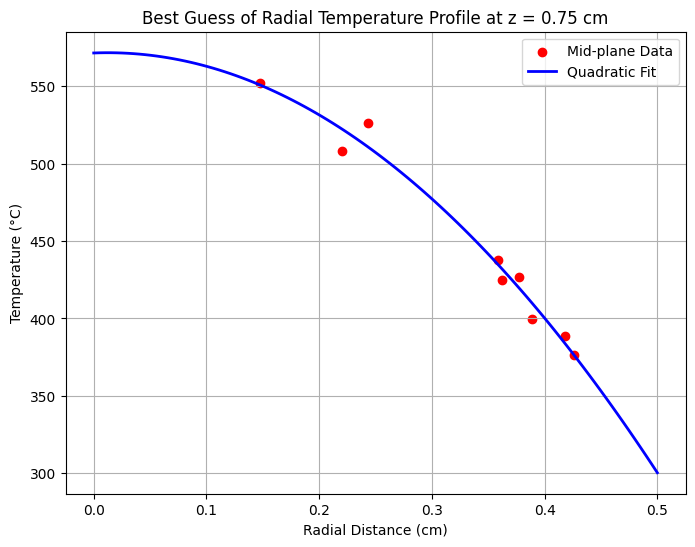

In [6]:
#imports
import matplotlib.pyplot as plt
import numpy as np
from numpy.polynomial.polynomial import Polynomial

#data
data = np.array([
    [5.1690e-02, 2.3766e-01, 6.7059e-01, 5.2645e+02],
    [1.1353e-01, 9.4708e-02, 5.3856e-01, 5.5201e+02],
    [1.6676e-01, 1.4358e-01, 4.6936e-01, 5.0802e+02],
    [1.3610e-01, 3.7207e-02, 2.1694e-01, 4.3663e+02],
    [8.9225e-02, 3.7293e-01, 1.1270e+00, 3.9234e+02],
    [1.9001e-01, 3.7240e-01, 8.4774e-01, 3.8872e+02],
    [5.4849e-02, 3.5425e-01, 5.7478e-01, 4.3784e+02],
    [1.7001e-01, 2.0241e-01, 1.2960e+00, 4.0159e+02],
    [2.0606e-01, 3.1594e-01, 6.4077e-01, 4.2652e+02],
    [2.5382e-01, 2.5859e-01, 4.8610e-01, 4.2481e+02],
    [5.6038e-02, 8.2231e-02, 4.2029e-01, 5.3244e+02],
    [3.1242e-01, 8.0489e-02, 1.1530e+00, 4.2453e+02],
    [6.0186e-02, 4.4891e-01, 3.9941e-01, 3.4207e+02],
    [1.5070e-01, 3.4794e-01, 1.5595e-01, 3.4750e+02],
    [1.8215e-01, 3.4388e-01, 1.0478e+00, 3.9963e+02],
    [1.1633e-01, 4.1011e-01, 5.5001e-01, 3.7611e+02],
    [1.2377e-01, 3.3703e-01, 3.7672e-02, 3.1423e+02],
    [4.6378e-02, 3.3653e-01, 1.4434e+00, 3.2345e+02],
    [2.9063e-02, 3.2584e-02, 2.3977e-01, 4.5993e+02],
    [2.1162e-02, 3.8590e-01, 2.5905e-01, 3.6901e+02]
])


#extract x, y, z, and T from  data
x = data[:, 0]
y = data[:, 1]
z = data[:, 2]
T = data[:, 3]

#calculate radial distance from the center (0,0), assuming the center of the cylinder is at (0,0) in the xy plane
r = np.sqrt(x**2 + y**2)

#filter mid-plane data (z ≈ 0.75 cm)
mid_plane_tolerance = 0.3 #taking data points where the z-coordinate is +- 0.3 cm of z = 0.75cm
mask = np.abs(z - 0.75) <= mid_plane_tolerance
r_mid, T_mid = r[mask], T[mask]

#fit quadratic polynomial where T(r) = a*r^2 + b*r + c
poly_coeffs = np.polyfit(r_mid, T_mid, 2)
poly = Polynomial(poly_coeffs[::-1]) #reverse coefficients

#evaluate fit from center to surface
R = 0.5 #radius of 1cm diameter pellet
r_eval = np.linspace(0, R, 100)
T_eval = poly(r_eval)

#plot
plt.figure(figsize=(8, 6))
plt.scatter(r_mid, T_mid, color='red', label='Mid-plane Data')
plt.plot(r_eval, T_eval, color='blue', linewidth=2, label='Quadratic Fit')
plt.xlabel('Radial Distance (cm)')
plt.ylabel('Temperature (°C)')
plt.title('Best Guess of Radial Temperature Profile at z = 0.75 cm')
plt.grid(True)
plt.legend()
plt.show()

# Question 2

You run an experiment and obtain the following data:

| x | y1 | y2 | y3 | y4 | y5 |
|---|---|---|---| --- | --- |
| 0.00 | -29.49 | -2.14 | 15.88 | 22.69 | 28.53 |
| 1.11 | 2.83 | 18.02 | -25.45 | -32.45 | 7.50 |
| 2.22 | 1.97 | -10.49 | -0.18 | -32.10 | -40.31 |
| 3.33 | -38.09 | -46.16 | -7.87 | -33.97 | -38.39 |
| 4.44 | -3.97 | -32.22 | -33.95 | -11.07 | -32.47 |
| 5.56 | 4.45 | -10.88 | 20.43 | 6.57 | -8.49 |
| 6.67 | 50.22 | 51.29 | 80.02 | 66.15 | 84.90 |
| 7.78 | 164.11 | 190.26 | 160.94 | 182.35 | 163.18 |
| 8.89 | 331.75 | 306.51 | 278.40 | 302.13 | 335.44 |
| 10.00 | 517.06 | 483.20 | 476.73 | 512.16 | 500.64 |



In [ ]:
import numpy as np

# Define the table as a list of lists
d = np.array([
    [0.00, -29.49, -2.14, 15.88, 22.69, 28.53],
    [1.11, 2.83, 18.02, -25.45, -32.45, 7.50],
    [2.22, 1.97, -10.49, -0.18, -32.10, -40.31],
    [3.33, -38.09, -46.16, -7.87, -33.97, -38.39],
    [4.44, -3.97, -32.22, -33.95, -11.07, -32.47],
    [5.56, 4.45, -10.88, 20.43, 6.57, -8.49],
    [6.67, 50.22, 51.29, 80.02, 66.15, 84.90],
    [7.78, 164.11, 190.26, 160.94, 182.35, 163.18],
    [8.89, 331.75, 306.51, 278.40, 302.13, 335.44],
    [10.00, 517.06, 483.20, 476.73, 512.16, 500.64]
])

## a) Determine the best cubic polynomial fit to this data with the uncertainty

{method, implementation, answer}

Cubic polynomial coefficients: [  0.8814571   -2.5883747  -13.09160479   9.52582656]
Uncertainty (standard deviation of residuals): 3.875188316675717


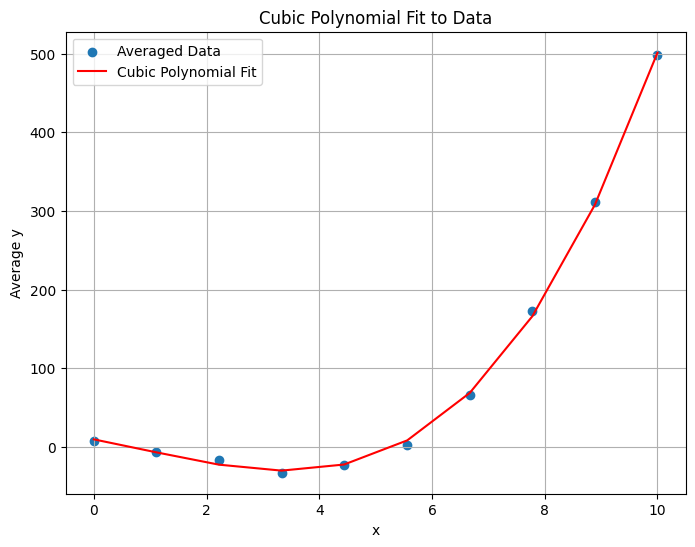

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the table as a list of lists
d = np.array([
    [0.00, -29.49, -2.14, 15.88, 22.69, 28.53],
    [1.11, 2.83, 18.02, -25.45, -32.45, 7.50],
    [2.22, 1.97, -10.49, -0.18, -32.10, -40.31],
    [3.33, -38.09, -46.16, -7.87, -33.97, -38.39],
    [4.44, -3.97, -32.22, -33.95, -11.07, -32.47],
    [5.56, 4.45, -10.88, 20.43, 6.57, -8.49],
    [6.67, 50.22, 51.29, 80.02, 66.15, 84.90],
    [7.78, 164.11, 190.26, 160.94, 182.35, 163.18],
    [8.89, 331.75, 306.51, 278.40, 302.13, 335.44],
    [10.00, 517.06, 483.20, 476.73, 512.16, 500.64]
])

# Extract x and y data from the array 'd'
x = d[:, 0]
# Average the y values for each x to get a single data point for each x value
y_avg = np.mean(d[:, 1:], axis=1)

# Perform a cubic polynomial fit (degree = 3)
coeffs = np.polyfit(x, y_avg, 3)

# Create a polynomial function from the coefficients
cubic_poly = np.poly1d(coeffs)

# Calculate the fitted values
y_fit = cubic_poly(x)

# Calculate the residuals
residuals = y_avg - y_fit

# Calculate the uncertainty (standard deviation of the residuals)
uncertainty = np.std(residuals)

print("Cubic polynomial coefficients:", coeffs)
print("Uncertainty (standard deviation of residuals):", uncertainty)

# Plot the original data and the fitted curve
plt.figure(figsize=(8, 6))
plt.scatter(x, y_avg, label='Averaged Data')
plt.plot(x, y_fit, color='red', label='Cubic Polynomial Fit')
plt.xlabel('x')
plt.ylabel('Average y')
plt.title('Cubic Polynomial Fit to Data')
plt.legend()
plt.grid(True)
plt.show()

## b) Your manager thinks this should be a quadratic. Which do you think it should be and why?

{Answer}

Quadratic polynomial coefficients: [ 10.63348184 -63.26113558  40.00920473]
Uncertainty (standard deviation of residuals) for quadratic fit: 21.607461806059934
Uncertainty for cubic fit: 3.875188316675717
The cubic fit has lower uncertainty and may be a better fit.


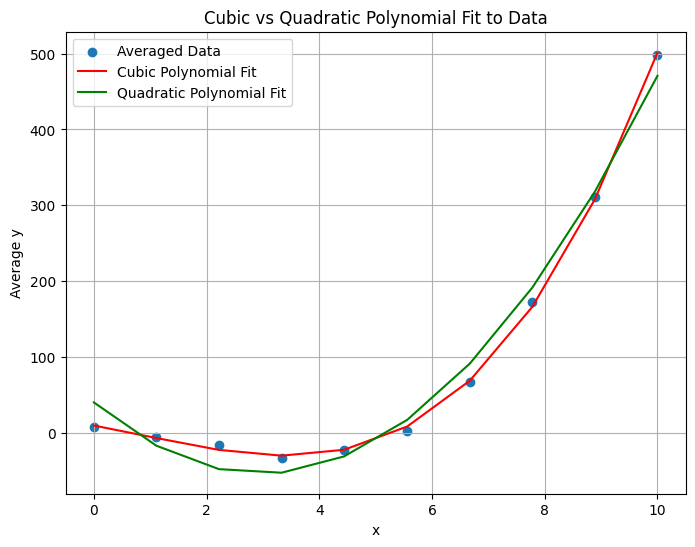

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the table as a list of lists (assuming 'd' is defined in a previous cell)
# If 'd' is not defined, please execute the cell where it is defined first.
d = np.array([
    [0.00, -29.49, -2.14, 15.88, 22.69, 28.53],
    [1.11, 2.83, 18.02, -25.45, -32.45, 7.50],
    [2.22, 1.97, -10.49, -0.18, -32.10, -40.31],
    [3.33, -38.09, -46.16, -7.87, -33.97, -38.39],
    [4.44, -3.97, -32.22, -33.95, -11.07, -32.47],
    [5.56, 4.45, -10.88, 20.43, 6.57, -8.49],
    [6.67, 50.22, 51.29, 80.02, 66.15, 84.90],
    [7.78, 164.11, 190.26, 160.94, 182.35, 163.18],
    [8.89, 331.75, 306.51, 278.40, 302.13, 335.44],
    [10.00, 517.06, 483.20, 476.73, 512.16, 500.64]
])

# Extract x and y data from the array 'd'
x = d[:, 0]
# Average the y values for each x to get a single data point for each x value
y_avg = np.mean(d[:, 1:], axis=1)

# Perform a cubic polynomial fit (degree = 3)
coeffs = np.polyfit(x, y_avg, 3)

# Create a polynomial function from the coefficients
cubic_poly = np.poly1d(coeffs)

# Calculate the fitted values
y_fit = cubic_poly(x)

# Calculate the residuals
residuals = y_avg - y_fit

# Calculate the uncertainty (standard deviation of the residuals) for cubic fit
uncertainty = np.std(residuals)


# Perform a quadratic polynomial fit (degree = 2)
coeffs_quadratic = np.polyfit(x, y_avg, 2)

# Create a polynomial function from the coefficients
quadratic_poly = np.poly1d(coeffs_quadratic)

# Calculate the fitted values for the quadratic fit
y_fit_quadratic = quadratic_poly(x)

# Calculate the residuals for the quadratic fit
residuals_quadratic = y_avg - y_fit_quadratic

# Calculate the uncertainty (standard deviation of the residuals) for the quadratic fit
uncertainty_quadratic = np.std(residuals_quadratic)

print("Quadratic polynomial coefficients:", coeffs_quadratic)
print("Uncertainty (standard deviation of residuals) for quadratic fit:", uncertainty_quadratic)
print("Uncertainty for cubic fit:", uncertainty)

# Compare the uncertainties
if uncertainty_quadratic < uncertainty:
    print("The quadratic fit has lower uncertainty and may be a better fit.")
elif uncertainty < uncertainty_quadratic: # Corrected variable name
    print("The cubic fit has lower uncertainty and may be a better fit.")
else:
    print("The uncertainties of the cubic and quadratic fits are similar.")

# Plot both fits for visual comparison
plt.figure(figsize=(8, 6))
plt.scatter(x, y_avg, label='Averaged Data')
plt.plot(x, y_fit, color='red', label='Cubic Polynomial Fit')
plt.plot(x, y_fit_quadratic, color='green', label='Quadratic Polynomial Fit')
plt.xlabel('x')
plt.ylabel('Average y')
plt.title('Cubic vs Quadratic Polynomial Fit to Data')
plt.legend()
plt.grid(True)
plt.show()



Based on the analysis, the cubic polynomial fit is better than the quadratic fit. This is because the cubic fit has a lower uncertainty (3.88) compared to the quadratic fit (21.61), as indicated by the standard deviation of the residuals. A lower uncertainty means that the fitted curve is closer to the actual data points. The plot also visually confirms that the cubic fit follows the trend of the data more closely.